# Introduction

In this project, you will build a neural network of your own design to evaluate the Fashion MNIST dataset.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

## Load the Dataset

Specify your transforms as a list if you intend to.
The transforms module is already loaded as `transforms`.

FashionMNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
trainset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Create test set and define test dataloader
testset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



100%|██████████| 26421880/26421880 [00:11<00:00, 2203383.21it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200318.91it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1504910.29it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6213604.89it/s]

Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



In [3]:
#size of training dataset
print(len(trainloader.dataset))
print(len(trainloader))
#Do you know what is the difference?

60000
938


Check shapes of Inputs and Outputs

In [5]:
dataiter = iter(trainloader) #queue containing the batches
images, labels = next(dataiter) #fetches the next batch in the queue
print(type(images))
print(images.shape)
print(labels.shape)
print(labels)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([2, 6, 9, 6, 9, 8, 5, 2, 2, 2, 5, 8, 5, 1, 9, 5, 7, 0, 8, 9, 8, 0, 7, 1,
        6, 9, 9, 1, 5, 4, 7, 9, 9, 4, 3, 4, 8, 0, 2, 7, 8, 0, 8, 5, 7, 5, 1, 4,
        4, 1, 5, 9, 3, 7, 3, 4, 7, 0, 5, 4, 7, 3, 8, 7])


In [3]:
# Create training set and define training dataloader
trainset,validset=torch.utils.data.random_split(trainset,[50000,10000])

trainloader_new = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=True)



## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


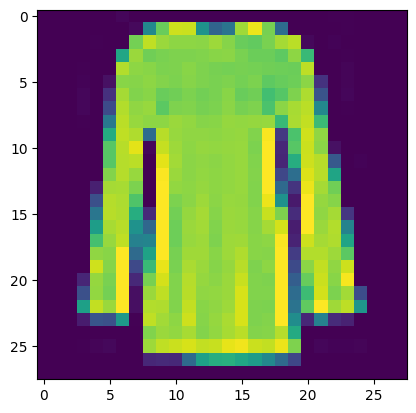

2


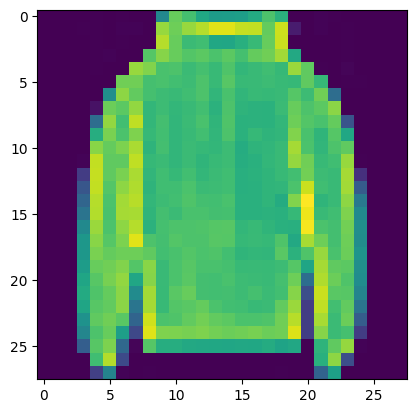

6


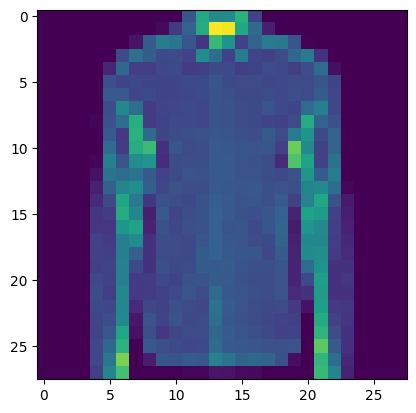

6


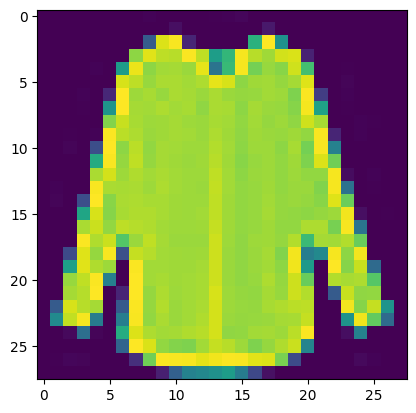

4


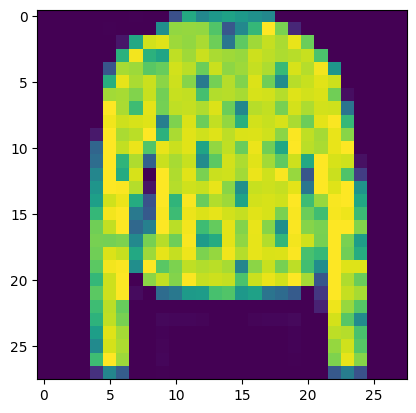

In [8]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader_new)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [4]:
## YOUR CODE HERE ##
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Define dropout layers with a dropout probability (e.g., 0.2)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after the first layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after the second layer
        x = F.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout after the rhird layer
        x=self.fc4(x) #output shape ((64,10)) #No dropout added
        #print(x.shape)
        x = F.log_softmax(x, dim=1) #logsoftmax for each row
        #print(x.shape) #output shape ((64,10))
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
## Create Model Instance, Evaluation Criteria, and define the optimizer
model = Classifier().to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

Network Training



In [12]:

#Training Loop
best_val_loss = float("inf")

epochs = 10
TLL=[]
VLL=[]
valid_loss=0;running_loss=0;
for e in range(epochs):
    running_loss = 0
    valid_loss = 0
    model.train()
    for images, labels in trainloader_new:

        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    model.eval()
    for images, labels in validloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels) #summing
        valid_loss += loss.item()

    T=running_loss/len(trainloader_new) #Error/batch
    V=valid_loss/len(validloader)    #Error/batch
    print(f"Epoch: {e}", f"    Training loss: {T}",f"    Validation loss: {V}")
    TLL.append(T)
    VLL.append(V)
    if V <  best_val_loss:
      best_val_loss = V
      Model_state_dict = model.state_dict()

#Save the best Model of the previously trained 10 Models
torch.save(Model_state_dict, 'best_model.pth')
print(f"New best model saved with NLLLoss Of {best_val_loss}")

Epoch: 0     Training loss: 0.42661706341044675     Validation loss: 0.409308184484008
Epoch: 1     Training loss: 0.40712328849698576     Validation loss: 0.3744705470314451
Epoch: 2     Training loss: 0.39469004355733045     Validation loss: 0.35886032006163504
Epoch: 3     Training loss: 0.38270322707912807     Validation loss: 0.3587158174271796
Epoch: 4     Training loss: 0.37380127854588086     Validation loss: 0.3630677131330891
Epoch: 5     Training loss: 0.3647743432265718     Validation loss: 0.3567097127247768
Epoch: 6     Training loss: 0.36329098477426086     Validation loss: 0.3803136674746586
Epoch: 7     Training loss: 0.3610664101227013     Validation loss: 0.3435723897378156
Epoch: 8     Training loss: 0.3527265473857255     Validation loss: 0.3585298993405263
Epoch: 9     Training loss: 0.34913771967296403     Validation loss: 0.34294235713447735
New best model saved with NLLLoss Of 0.34294235713447735


Now we can load the best Model to test it against the test dataset using?


In [13]:

#Load the presaved Best Model
model = Classifier()

model.load_state_dict(torch.load('best_model.pth'))

#Evaluate Model Accuracy using the test dataset
correct_per_batch = 0

model.eval()
for images, labels in testloader:
  log_ps = model(images)
  ps = torch.exp(log_ps)
  Pred_indices = torch.argmax(ps,dim=1)
  #print("Bach predictions",Pred_indices)
  #print("Real predictions",labels)
  correct_per_batch += (Pred_indices == labels).sum().item()

#Accuracy
correctly_classified = ( correct_per_batch/len(testloader.dataset) )* 100
print(correctly_classified)


87.4


Train a CNN for that Model

In [18]:
class ConvNet(nn.Module):
    def __init__(self):
        # We optimize dropout rate in a convolutional neural network.
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=16, kernel_size=3, stride=1, padding = "same")
        ## ToDo: Create another convolution layer  that generates 32 Feature maps name it self.conv2
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding = "same")

        ## ToDo: Create a MaxPool Layer of size (2,2) name it self.pool
        self.pool = nn.MaxPool2d(kernel_size = 2)

        #Defining Fully Connected Layers
        self.fc1 = nn.Linear(1568, 512)
        self.fc2 = nn.Linear(512, 96)
        self.fc3 = nn.Linear(96, 10) # 10 classes

        self.drop2d=nn.Dropout2d(p=0.2)
        self.drop1d = nn.Dropout1d(p=0.2)


    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))  # 1 x 28 x 28 ->  16 x 28 x 28 ->  16 x 14 x 14
        x = F.relu(self.pool(self.conv2(x)))  # 16 x 14 x 14  -->  32 x 14 x 14 ->  32 x 7 x 7
        x = self.drop2d(x)

        #Flattening the 2D image
        x = x.view(x.size(0),-1)             #7x7x32-->1568
        x = F.relu(self.fc1(x))              #1568 --> 512
        x = F.relu(self.fc2(x))              #512 --> 96
        x = self.fc3(x)                      #96--> 10
        #Note that No logsoftmax applied, i.e, we can use CrossEntropy

        return x

In [19]:
#Instantiate the model
CNN_model = ConvNet()
CNN_model


ConvNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=96, bias=True)
  (fc3): Linear(in_features=96, out_features=10, bias=True)
  (drop2d): Dropout2d(p=0.2, inplace=False)
  (drop1d): Dropout1d(p=0.2, inplace=False)
)

### Check for GPU

In [20]:
## To DO Check if GPU exists and upload your model to in case it exists
if torch.cuda.is_available():
    device = torch.device("cuda")
    CNN_model.to(device)
else:
    device = torch.device("cpu")


### Specify Optimizer and Losse

In [21]:
optimizer = optim.Adam(CNN_model.parameters(), lr=0.003)
criterion= nn.CrossEntropyLoss() #Question: Is using this loss function correct? Or should we use NLLLoss?

In [22]:
history={'train_loss':[],'valid_loss':[],'train_acc':[],'valid_acc':[]}
num_epochs=10

for epoch in range(num_epochs):
    train_loss,train_correct=0.0,0

    model.train()
    for images, labels in trainloader_new:

        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = CNN_model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        scores, predictions = torch.max(output.data, 1)
        train_correct += (predictions == labels).sum().item()     #Correctly classified Images

    valid_loss, val_correct = 0.0, 0

    model.eval()
    for images, labels in validloader:

        images,labels = images.to(device),labels.to(device)
        output = CNN_model(images)
        loss=criterion(output,labels)
        valid_loss+=loss.item()*images.size(0)
        scores, predictions = torch.max(output.data,1)
        val_correct += (predictions == labels).sum().item()

    train_loss = train_loss / len(trainloader_new.sampler)
    train_acc = train_correct / len(trainloader_new.sampler)*100
    valid_loss = valid_loss / len(validloader.sampler)
    valid_acc = val_correct / len(validloader.sampler) * 100

    print("Epoch:{}/{} \t AVERAGE TL:{:.4f} AVERAGE VL:{:.4f} \t AVERAGE TA:{:.2f} %  AVERAGE VA:{:.2f} %".format(epoch + 1, num_epochs,
                                                                                         train_loss,
                                                                                         valid_loss,
                                                                                         train_acc,
                                                                                        valid_acc))
    history['train_loss'].append(train_loss)
    history['valid_loss'].append(valid_loss)
    history['train_acc'].append(train_acc)
    history['valid_acc'].append(valid_acc)

Epoch:1/10 	 AVERAGE TL:0.4785 AVERAGE VL:0.3464 	 AVERAGE TA:82.16 %  AVERAGE VA:87.76 %
Epoch:2/10 	 AVERAGE TL:0.3055 AVERAGE VL:0.2923 	 AVERAGE TA:88.74 %  AVERAGE VA:89.39 %
Epoch:3/10 	 AVERAGE TL:0.2632 AVERAGE VL:0.2797 	 AVERAGE TA:90.31 %  AVERAGE VA:89.86 %
Epoch:4/10 	 AVERAGE TL:0.2339 AVERAGE VL:0.2639 	 AVERAGE TA:91.18 %  AVERAGE VA:90.79 %
Epoch:5/10 	 AVERAGE TL:0.2117 AVERAGE VL:0.2833 	 AVERAGE TA:92.08 %  AVERAGE VA:90.54 %
Epoch:6/10 	 AVERAGE TL:0.1967 AVERAGE VL:0.2538 	 AVERAGE TA:92.69 %  AVERAGE VA:91.13 %
Epoch:7/10 	 AVERAGE TL:0.1807 AVERAGE VL:0.2490 	 AVERAGE TA:93.29 %  AVERAGE VA:91.64 %
Epoch:8/10 	 AVERAGE TL:0.1651 AVERAGE VL:0.2915 	 AVERAGE TA:93.83 %  AVERAGE VA:90.60 %
Epoch:9/10 	 AVERAGE TL:0.1529 AVERAGE VL:0.3017 	 AVERAGE TA:94.23 %  AVERAGE VA:90.42 %
Epoch:10/10 	 AVERAGE TL:0.1443 AVERAGE VL:0.2764 	 AVERAGE TA:94.61 %  AVERAGE VA:91.51 %


Calculating Testset accuracy

### Evaluate model on test set


In [23]:
correct = 0
total = 0
test_loss = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = CNN_model(images)
        loss = criterion(outputs,labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(testloader.sampler)

print('Accuracy of the network on the test images: {:.2f} %%'.format(100 * correct / total))
print('Loss of the network on the test images: {:.4f}'.format(test_loss))

Accuracy of the network on the test images: 90.55 %%
Loss of the network on the test images: 0.2939
